In [5]:
import pandas as pd 
pd.options.display.float_format = '{:,.3f}'.format
import numpy as np
import os
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.spatial import distance  

In [9]:
# DATALIFT
data_100 = pd.read_excel("../20220810_1252_Schreder_FW.xls")
# data_100 = pd.read_excel("../20220906_1159_Schreder_FW.xls")

data_200 = pd.read_excel("../20220810_1256_Schreder_FW.xls")
# data_200 = pd.read_excel("../20220906_1202_Schreder_FW.xls")

data_300 = pd.read_excel("../20220810_1300_Schreder_FW.xls")
# data_300 = pd.read_excel("../20220906_1206_Schreder_FW.xls")

error_class = 0.5/100

test_pre = [data_100, data_200, data_300]
test_pos = []

for df_condition in test_pre:
    df_raw = pd.DataFrame()

    df_raw['PM Vrms'] = df_condition['PM Vrms']
    df_raw['PM Arms'] = df_condition['PM Arms']
    df_raw['G4 Vrms'] = df_condition['G4 voltage [V]']
    df_raw['G4 Arms'] = df_condition['G4 current [A]']

    # df = pd.DataFrame(
    #     data={
    #         "G4 Vrms": np.interp(df_raw['PM s'], df_raw['G4 s'], df_condition['G4 voltage [V]']),
    #         "G4 Arms": np.interp(df_raw['PM s'], df_raw['G4 s'], df_condition['G4 current [A]'])
    #     }
    # )
    # df_raw = pd.concat([df_raw, df], axis=1)

    df_raw["Voltage_Error"] = 100*(df_raw["G4 Vrms"]-df_raw['PM Vrms'])/df_raw['PM Vrms']
    df_raw["Current_Error"] = 100*(df_raw["G4 Arms"]-df_raw['PM Arms'])/df_raw['PM Arms']
    df_raw = df_raw.drop(0)
    df_raw = df_raw.drop(1)
    df_raw = df_raw.drop(2)
    test_pos.append(df_raw)

df_limits = pd.DataFrame()
df_limits['Max_Class_Error'] = 100*error_class*np.ones(len(test_pos[0]['PM Vrms']))
df_limits['Min_Class_Error'] = -100*error_class*np.ones(len(test_pos[0]['PM Vrms']))

test_pos[0]

PM Vrms  PM Arms  G4 Vrms  G4 Arms  Voltage_Error  Current_Error
3   100.030    0.513  100.029    0.513         -0.001          0.008
4   100.020    0.513  100.064    0.512          0.044         -0.183
5   100.030    0.513  100.029    0.513         -0.001          0.078
6    99.907    1.012   99.887    1.012         -0.020         -0.040
7    99.910    1.012   99.887    1.011         -0.023         -0.138
8    99.906    1.013   99.852    1.012         -0.054         -0.089
9    99.803    1.511   99.745    1.513         -0.058          0.139
10   99.793    1.510   99.745    1.511         -0.048          0.033
11   99.794    1.510   99.745    1.512         -0.049          0.132
12   99.682    2.011   99.568    2.011         -0.114          0.020
13   99.680    2.011   99.568    2.010         -0.112         -0.045
14   99.683    2.011   99.568    2.010         -0.115         -0.045
15   99.661    2.509   99.532    2.512         -0.129          0.132
16   99.668    2.510   99.532    2.511         -0.136          0.052
17   99.665    2.509   99.532    2.512         -0.133          0.112
18   99.547    3.011   99.355    3.009         -0.193         -0.080
19   99.544    3.011   99.390    3.012         -0.155          0.043
20   99.551    3.010   99.390    3.010         -0.162          0.010
21   99.431    3.511   99.248    3.512         -0.184          0.037
22   99.416    3.509   99.248    3.512         -0.169          0.094
23   99.429    3.509   99.248    3.510         -0.182          0.031
24   99.307    4.014   99.035    4.009         -0.274         -0.137
25   99.314    4.014   99.035    4.009         -0.281         -0.137
26   99.306    4.016   99.071    4.011         -0.237         -0.115
27   99.196    4.508   98.929    4.509         -0.269          0.027
28   99.188    4.505   98.929    4.509         -0.261          0.078
29   99.194    4.508   98.929    4.511         -0.267          0.071
30   99.175    5.004   98.858    5.009         -0.320          0.106
31   99.178    5.005   98.858    5.007         -0.323          0.048
32   99.181    5.003   98.858    5.007         -0.326          0.070
33   99.053    5.509   98.716    5.507         -0.340         -0.034
34   99.064    5.505   98.716    5.507         -0.351          0.027
35   99.045    5.507   98.716    5.503         -0.332         -0.067
36   98.927    6.007   98.539    6.004         -0.392         -0.052
37   98.929    6.008   98.539    6.004         -0.394         -0.065
38   98.936    6.007   98.574    6.005         -0.366         -0.028
39   98.802    6.510   98.397    6.501         -0.410         -0.140
40   98.784    6.506   98.361    6.505         -0.428         -0.014
41   98.806    6.508   98.361    6.503         -0.450         -0.074
42   98.608    7.011   98.148    6.999         -0.466         -0.165
43   98.609    7.008   98.184    7.002         -0.431         -0.081
44   98.585    7.010   98.148    7.001         -0.443         -0.123
45   98.568    7.516   97.971    7.494         -0.606         -0.298
46   98.581    7.514   98.077    7.497         -0.511         -0.229
47   98.567    7.516   98.077    7.496         -0.497         -0.267

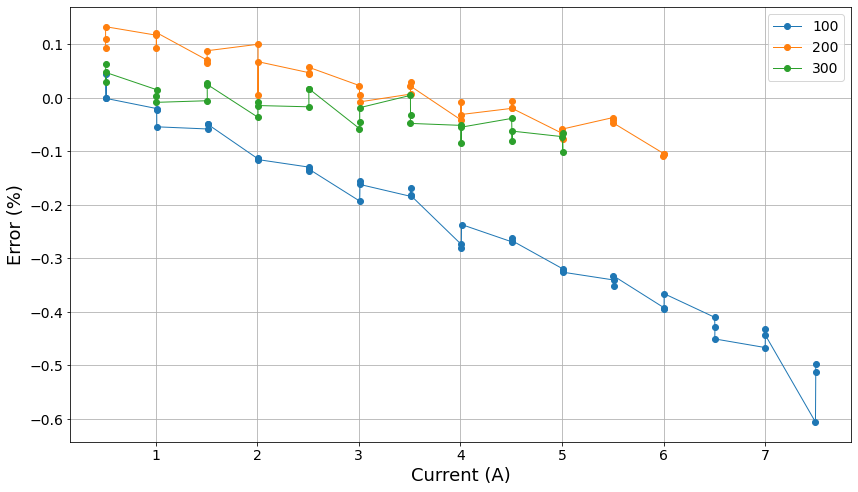

In [10]:
# Raw Reference visualization
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)
ax = plt.gca()

sizeh = 14
sizev = 8

# df_limits.plot(y='Max_Class_Error', ax=ax, figsize=(sizeh, sizev), label="Max_Error", linewidth=3, color='red')
# df_limits.plot(y='Min_Class_Error', ax=ax, figsize=(sizeh, sizev), label="Min_Error", linewidth=3, color='blue')
# ax.fill_between(test_pos[1]['PM s'], test_pos[1]['Max_Error'], test_pos[1]['Min_Error'], facecolor ='green', alpha = 0.10)

for index, df_raw in enumerate(test_pos):
    df_raw.plot(y='Voltage_Error', x='G4 Arms', ax=ax, figsize=(sizeh, sizev), label=(index+1)*100, linewidth=1, marker='o')
    ax.set_xlabel("Current (A)", fontsize=18)
    ax.set_ylabel("Error (%)", fontsize=18)
    # plt.axis((1, 10, -0.75, 0.75))
    plt.legend(loc=1, fontsize = 14)
    plt.grid(True)

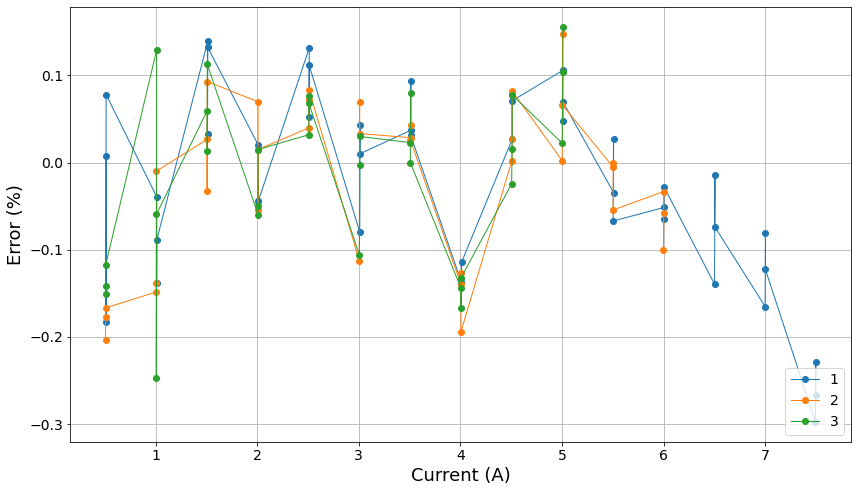

In [11]:
# Raw Reference visualization
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)
ax = plt.gca()

sizeh = 14
sizev = 8

# df_limits.plot(y='Max_Class_Error', ax=ax, figsize=(sizeh, sizev), label="Max_Error", linewidth=3, color='red')
# df_limits.plot(y='Min_Class_Error', ax=ax, figsize=(sizeh, sizev), label="Min_Error", linewidth=3, color='blue')
# ax.fill_between(test_pos[1]['PM s'], test_pos[1]['Max_Error'], test_pos[1]['Min_Error'], facecolor ='green', alpha = 0.10)

for index, df_raw in enumerate(test_pos):
    df_raw.plot(y='Current_Error', x='G4 Arms', ax=ax, figsize=(sizeh, sizev), label=index+1, linewidth=1, marker='o')
    ax.set_xlabel("Current (A)", fontsize=18)
    ax.set_ylabel("Error (%)", fontsize=18)
    # plt.axis((1, 10, -1.5, 1))
    plt.legend(loc=4, fontsize = 14)
    plt.grid(True)